In [16]:
%pylab inline
import sys
sys.path.append("/storage/BonnieH/selection_project/helper_functions")
from Joint_method_functions import *
import glob
import numpy as np
from scipy import stats
import matplotlib
from matplotlib import pyplot as plt
matplotlib.rcParams['pdf.fonttype'] = 42
matplotlib.rcParams['ps.fonttype'] = 42
PLOTDIR = '/storage/BonnieH/selection_project/joint_method/figures/supp_validation/'

Populating the interactive namespace from numpy and matplotlib


In [17]:
# PLot validation of each optimal allele in a period together

def main():
    print('Running main')
    
    folder = 't23'
    fig_num = 0
    pers = [3] 
    #color_list = ['C0','C1','C2','C3','C4','C5','C6','C7','C8','C9','b','k']
    color_list = ['red','orange','gold','lawngreen','forestgreen','turquoise','blue','purple','brown','slategray','yellow','purple']
    motif_dic = {}
    motif_dic[2] = ['AC','AG','AT']
    motif_dic[3] = ['ACC','AGG','AGC','CCG','AAG','AAC','ATC','AAT','ACT','0.0','1.0']
    motif_dic[4] = ['AAGG','AAAT','ATCC','AATC','AAAC','AATG','ACAT','AGAT','AAAG']
    
    opt_dic = {}
    opt_dic[2] = range(11,21,1)
    opt_dic[3] = range(5,14,1)
    opt_dic[4] = range(7,11,1)
    #clrs = sns.color_palette('husl', n_colors=10)
    color_dic_motif={}
    '''
    for per in pers:
        i = -1
    
        for motif in motif_dic[per]:
            i = i + 1
            color_dic_motif[motif] = color_list[i]
    '''
    color_dic_motif['0.0'] = 'black'
    color_dic_motif['1.0'] = 'red'
    color_dic_opt={}
    for per in pers:
        i = -1
        for opt in opt_dic[per]:
            i = i + 1
            color_dic_opt[(per, opt)] = color_list[i]
             
    dic_means = {}
    dic_legend = {}
    dic_diff_min = {}
    dic_diff_max = {}
    dic_num_loci = {}

    motifs = ['0.0','1.0']
    for per in pers:
        dic_means[per] = {}
        dic_legend[per] = {}
        dic_diff_min[per] = {}
        dic_diff_max[per] = {}
        dic_num_loci[per] = {}
        for motif in motifs:
            dic_means[per][motif] = [-1] * len(opt_dic[per])
            dic_legend[per][motif] = opt_dic[per]
            dic_diff_min[per][motif] = [0] * len(opt_dic[per])
            dic_diff_max[per][motif] = [0] * len(opt_dic[per])
            dic_num_loci[per][motif] = [0] * len(opt_dic[per])
   
    spacing = 8
    # Plot motifs (sep graph for each opt allele)
    for per in pers:
        minimum = 100
        maximum = -100
        opt_alleles = opt_dic[per]
        print('Running period: %d'%(per))
        
        list_of_mean = []
        errors = []
        legend_labels = []
        for opt in opt_alleles:
            opt_string = str(opt)
            if opt < 10:
                opt_string = '0' + opt_string
            file_list = glob.glob('./results/results/%s/per_%d_7_*opt_%s.txt'%(folder, per, opt_string) )
            file_list.sort() 
        
            for filename in file_list:
               
                results_file = open(filename, 'r')
                lines = results_file.readlines()
                line = lines[9]
                info = line.strip().split(': ')
                num_acc = int(info[1])
                line = lines[1]
                info = line.strip().split(': ')
                num_loci = int(info[1])
                
                if num_acc > 0 and num_loci >= 10:
                    line = lines[2]
                    info = line.strip().split(': ')
                    motif = info[2]
                    motif = motif.strip().split(' ')
                    motif = motif[0]
                    opt_allele = int(info[3])
                    
                    line = lines[11]
                    info = line.strip().split(',')
                    k = float(info[0])
                    theta = float(info[1])
                    line = lines[15]       
                    info = line.strip().split(': ')
                    params = info[1]
                    params = params.strip().split('), ')
                    #print(params)
                    params_list = []
                    for param in params:
                        param = param[1:]
                        if param[-1] == ')':
                            param = param[:-1]
                        param = param.strip().split(', ')
                        params_list.append(((float(param[0])), float(param[1])))
                    if 1==1:
                        #list_of_mean.append(mean_value)
                        # Sort by theta
                        #sorted_params = sorted(params_list, key=lambda x: x[0]*x[1])
                        #print(sorted_params)
                        #num_accepted = len(sorted_params)
                        means_list = []
                        
                        #if len(params_list) > 2:
                            #params_list = params_list[0:2]
                        for params_combo in params_list:
                            s, median, mean = GetGammaBins(params_combo[0], params_combo[1], 100, True)
                            means_list.append(mean)
                            #means_list.append(params_combo[0]*params_combo[1])
                        num_accepted = len(params_list)
                        #total = total + num_accepted
                        mean_of_means = np.mean(means_list)
                        std_err = stats.sem(means_list, ddof = 0)
                        #print('Mean',mean_of_means, std_err)
                        #print(means_list)
                        #print(max(means_list),min(means_list))
                        #print(num_accepted)
                        #list_acc = list(range(0,num_accepted))
                        #print(list_acc)
                        #middle_index = int(num_accepted/2)
                        
                        #lower_index = int(np.percentile(list_acc, 2.5))
                        
                        #upper_index = int(np.percentile(list_acc, 97.5))
                        
                        #svals, med_s = GetGammaBins(sorted_params[middle_index][0], sorted_params[middle_index][1], True)
                        #svals, lower_s = GetGammaBins(sorted_params[lower_index][0], sorted_params[lower_index][1], True)
                        #svals, upper_s = GetGammaBins(sorted_params[upper_index][0], sorted_params[upper_index][1], True)
                        #print('Lower, med, upper')
                        #med_s = sorted_params[middle_index][0]*sorted_params[middle_index][1]
                        #if med_s < 10**-5:
                            #med_s = 10**-5
                        #if lower_s < 10**-5:
                            #lower_s = 10**-5
                        #if upper_s < 10**-5:
                            #upper_s = 10**-5
                        #print(lower_s)
                        #print(med_s)
                        #print(upper_s)
                        dic_means[per][motif][opt-opt_alleles[0]]= mean_of_means
                        dic_diff_min[per][motif][opt-opt_alleles[0]]= std_err
                        dic_diff_max[per][motif][opt-opt_alleles[0]]= std_err
                        dic_num_loci[per][motif][opt-opt_alleles[0]]= num_loci
                        print((mean_of_means,mean_of_means-std_err,mean_of_means+std_err))
                        max_val = max(mean_of_means,mean_of_means-std_err,mean_of_means+std_err)
                        min_val = min(mean_of_means,mean_of_means-std_err,mean_of_means+std_err)
                        #legend_labels.append((motif, opt_allele))
                        if min_val < minimum:
                            minimum = min_val
                        if max_val > maximum:
                            maximum = max_val
                
        # PLOT HISTOGRAM OF NUM LOCI
        #fig, (ax1, ax2) = plt.subplots(2, sharex=True)


        #fig_num = fig_num + 1
        #fig = plt.figure(fig_num)
        #fig.set_size_inches((12, 8))
        fig, axs = plt.subplots(2, 1, gridspec_kw={'height_ratios': [1, 3]},sharex=True,figsize=(15,10))

        #fig.suptitle('Period %d'%(per),size=15)
        ax1 = axs[0]
        ax2 = axs[1]
        #ax1 = fig.add_subplot(211)

        #fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 2)) #

        offset = 0
        median_pos = int(len(dic_means[per])/2)
        i = 0
        for motif in dic_means[per]:
            lab = 'Noncoding'
            if motif == '1.0':
                lab = 'Coding'

            list_of_num_loci = dic_num_loci[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))
            #plt.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=motif)  
            ax1.bar(y_pos, list_of_num_loci,color=color_dic_motif[motif],label=lab)  
            offset = offset + 1

        #plt.ylabel("Number of loci",size=15)
        #plt.yticks(size=15)
        #plt.xticks([])
        #plt.title('Period %d'%(per),size=15)

        ax1.set_ylabel("Number of loci",size=15)
        ax1.tick_params(labelsize=15)
        ax1.set_xticks([])
        ax1.set_title('Trinucleotides Coding vs. Noncoding',size=15)
        # Plot mean +/- ABC 95% CI
        #fig_num = fig_num + 1
        #plt.figure(fig_num, figsize=(12, 6)) #
        #ax2 = fig.add_subplot(212,sharex=ax1)
        offset = 0
        median_pos = int(len(dic_means[per])/2)

        for motif in dic_means[per]:
            lab = 'Noncoding'
            if motif == '1.0':
                lab = 'Coding'

            list_of_mean = dic_means[per][motif]
            legend_labels = dic_legend[per][motif]
            diff_min = dic_diff_min[per][motif]
            diff_max = dic_diff_max[per][motif]
            y_pos = list(range(offset,(len(dic_means[per])+spacing)*len(opt_alleles) + offset,len(dic_means[per])+spacing))

            #plt.errorbar(y_pos, list_of_mean, marker = 'o', ls = 'none',yerr=[diff_min,diff_max],c=color_dic_motif[motif],label=motif)  #c=color_list[color_num],#,  label = 'Per %d Opt %d'%(per, opt)
            ax2.errorbar(y_pos, list_of_mean, marker = 'o', ls = 'none',yerr=[diff_min,diff_max],c=color_dic_motif[motif],label=lab)
            if offset == median_pos:
                y_pos_graph = y_pos

            offset = offset + 1

        #plt.yscale('log')
        #plt.xticks(y_pos_graph, legend_labels, rotation = 35, size=15) 
        #plt.ylabel("Mean of estimated s value distribution",size=15)
        #plt.xlabel("Optimal allele",size=15)
        #plt.yticks(size=15)
        #plt.legend()

        ax2.set_yscale('log')
        ax2.tick_params(labelsize=15)
        ax2.set_xticks(y_pos_graph) 
        ax2.set_xticklabels(legend_labels)
        ax2.set_ylabel("s (mean +/- std error)",size=15)
        ax2.set_xlabel("Optimal allele",size=15)
        ax1.legend(bbox_to_anchor=(1, 1))

        #plt.axvline(x=2.5, linestyle = '--',c='black')
        #plt.axvline(x=5.5, linestyle = '--',c='black')
        #plt.axvline(x=8.5, linestyle = '--',c='black')
        #plt.text(0.2,10**-7.7,'Mean s=' + r'$10^{-5}$',size=15)
        #plt.text(3.2,10**-7.7,'Mean s=' + r'$10^{-4}$',size=15)
        #plt.text(6.2,10**-7.7,'Mean s=' + r'$10^{-3}$',size=15)
        #plt.text(9.2,10**-7.7,'Mean s=' + r'$10^{-2}$',size=15)
        #plt.text(4.7,10**-8,'Ground truth a,b',size=15)
        '''
        plt.text(0.7,10**-7.7,r'$s=10^{-5}$',size=15)
        plt.text(3.7,10**-7.7,r'$s=10^{-4}$',size=15)
        plt.text(6.7,10**-7.7,r'$s=10^{-3}$',size=15)
        plt.text(9.7,10**-7.7,r'$s=10^{-2}$',size=15)
        '''
        ax2.set_ylim(minimum - minimum/2, maximum + minimum/2)
        fig.tight_layout()
        #plt.legend()
        #plt.savefig(PLOTDIR + 'joint_validation.pdf',bbox_inches='tight')

Running main
Running period: 3
(0.010042524616545825, 0.009486969758227699, 0.010598079474863952)
(0.05410044976898242, 0.05236487855636618, 0.055836020981598664)
(0.021137086353332776, 0.019494104115812295, 0.022780068590853256)
(0.018245195985982773, 0.017075398505518133, 0.019414993466447414)
(0.0147832145313888, 0.013666645769931315, 0.015899783292846286)
(0.04199476664593162, 0.03878982765858353, 0.045199705633279706)
(0.006296204887359793, 0.005457715049316915, 0.007134694725402671)
(0.08771066109398913, 0.07090739839578325, 0.10451392379219501)
(0.009303723937842278, 0.008181977229420757, 0.010425470646263799)
(0.010877099164848459, 0.008993265145082311, 0.012760933184614607)
(0.00015475364424036262, 3.547532682984317e-05, 0.0002740319616508821)
(0.007453713980000788, 0.005034445487472481, 0.009872982472529095)
(5.375376270791768e-05, 5.239434896083878e-05, 5.511317645499658e-05)
(0.00012688867487687703, 0.00012525599384571024, 0.00012852135590804383)
(0.00039319580587429947, 0.

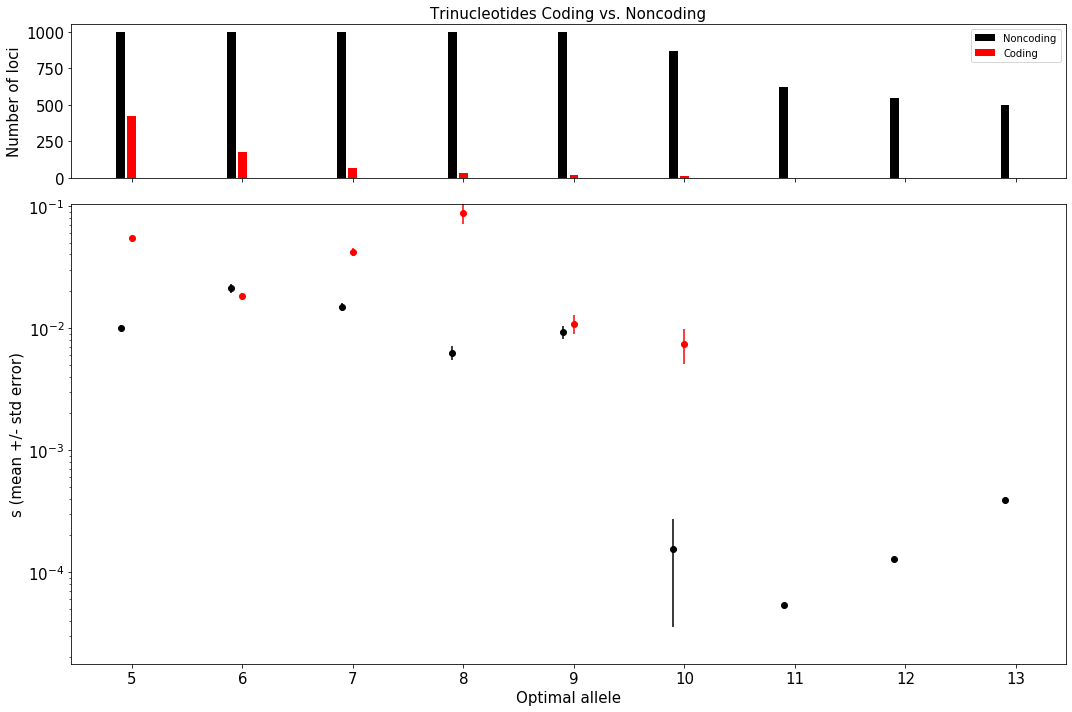

In [18]:
%%time
if __name__ == '__main__':
    main()